In [5]:
import qiskit
from qiskit_aer import AerSimulator
# from qiskit.quantum_info import Statevector
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt

In [15]:
dt = 1

In [72]:
def getSimStep(dt):
    circ = qiskit.QuantumCircuit(qiskit.QuantumRegister(3, 'x'),qiskit.QuantumRegister(1,'a'),name=r"${e}^{-i\delta t H}$")
    circ.rx(pi/2,1)
    circ.h(2)
    circ.cx([0,1,2],3)
    circ.rz(2*dt,3)
    circ.cx([2,1,0],3)
    circ.rx(-pi/2,1)
    circ.h(2)
    return circ.to_gate()

The final circuit is:

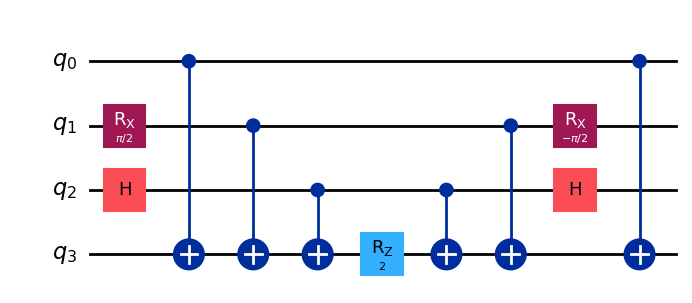

In [81]:
qiskit.QuantumCircuit(4).compose(getSimStep(dt),range(4)).decompose().draw('mpl')

Now we can do the Simulation of $\ket{\psi(0)}$ ( the exercises states  $\ket{\psi(0)} = \ket{00}$, but we are dealing with a 3 qubit system, therefore I assume a typo and use  $\ket{\psi(0)}= \ket{000}$)

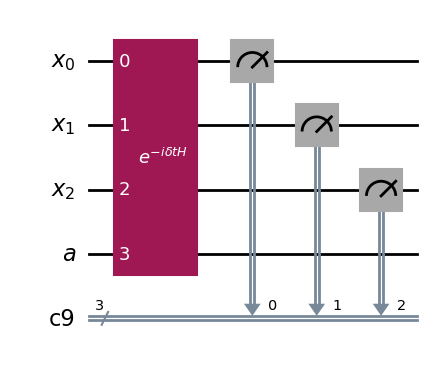

In [82]:
circ = qiskit.QuantumCircuit(qiskit.QuantumRegister(3, 'x'),qiskit.QuantumRegister(1,'a'), qiskit.ClassicalRegister(3), name=r"${e}^{-i\delta t H}$")
circ.append(getSimStep(dt), circ.qubits[:])
circ.measure(circ.qregs[0],circ.cregs[0])
circ.draw('mpl')

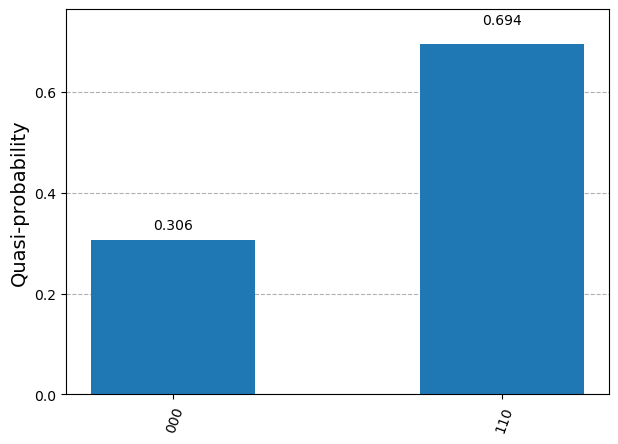

In [84]:
sim = AerSimulator(method='statevector')
counts = sim.run(qiskit.transpile(circ, sim),shots=1000).result().get_counts(0)
qiskit.visualization.plot_distribution(counts)